<a href="https://colab.research.google.com/github/Jyotiprakash01/Netflix-Data-Exploration-and-Visualisation/blob/main/Netflix_Data_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Business Case: Netflix - Data Exploration and Visualisation
## Analyse the data and generate insights that could help Netflix in deciding which type of shows/movies to produce and how they can grow the business in different countries

Dataset Link:

The dataset provided consists of a list of all the TV shows/movies available on Netflix:


*   Show_id: Unique ID for every Movie / Tv Show
*   Type: Identifier - A Movie or TV Show
*   Title: Title of the Movie / Tv Show
*   Director: Director of the Movie
*   Cast: Actors involved in the movie/show
*   Country: Country where the movie/show was produced
*   Date_added: Date it was added on Netflix
*   Release_year: Actual Release year of the movie/show
*   Rating: TV Rating of the movie/show
*   Duration: Total Duration - in minutes or number of seasons
*   Listed_in: Genre
*   Description: The summary description


#1. Problem Statement
Netflix aims to optimize its content strategy by understanding:

*   Content Preferences: Which types of movies/TV shows perform best?
*   Global Expansion: How to tailor content for different countries?
*   Trends Over Time: How has content production evolved?
*   Optimal Release Timing: When should new shows/movies be launched?
*   Key Talent: Which actors/directors are most frequent in successful content?

The goal is to provide data-driven recommendations to guide Netflix's content production and business growth.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##Loading the netflix dataset into a pandas DataFrame and display the first 5 rows.



In [6]:
import pandas as pd

netflix_df = pd.read_csv('netflix.csv')
display(netflix_df.head())

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


##Examining shape, descriptive statistics, missing values, data types, and unique values for categorical columns.


In [8]:
print("Data Shape:", netflix_df.shape)

print("\nDescriptive Statistics:\n", netflix_df.describe(include='number'))

missing_values = netflix_df.isnull().sum()
missing_percentage = (missing_values / len(netflix_df)) * 100
print("\nMissing Values:\n", missing_values)
print("\nMissing Value Percentage:\n", missing_percentage)

print("\nData Types:\n", netflix_df.dtypes)

categorical_cols = netflix_df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\nUnique values and counts for '{col}':\n{netflix_df[col].value_counts()}")


Data Shape: (8807, 12)

Descriptive Statistics:
        release_year
count   8807.000000
mean    2014.180198
std        8.819312
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000

Missing Values:
 show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

Missing Value Percentage:
 show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

Data Types:
 show_id         object
type            object
title           object
director        object
cast            object
coun

## Cleaning the data by handling missing values in the DataFrame.


In [12]:
import numpy as np

categorical_cols = ['director', 'cast', 'country', 'rating', 'date_added', 'listed_in']
for col in categorical_cols:
    if netflix_df[col].dtype == 'object':
        netflix_df[col] = netflix_df[col].fillna("Unknown")
    elif col == 'date_added':
        netflix_df[col] = pd.to_datetime(netflix_df[col], errors='coerce')

import pandas as pd

if 'duration' in netflix_df.columns:
    netflix_df['duration_int'] = netflix_df['duration'].str.extract('(\d+)').fillna(0).astype(int)
    netflix_df['duration_type'] = netflix_df['duration'].str.extract('(min|Season|Seasons)').fillna('Unknown')
    netflix_df.drop('duration', axis=1, inplace=True)

netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'], errors='coerce')
netflix_df['date_added'] = netflix_df['date_added'].fillna(pd.to_datetime('1900-01-01'))

netflix_df['release_week'] = netflix_df['date_added'].dt.isocalendar().week
netflix_df['release_month'] = netflix_df['date_added'].dt.month

netflix_df['time_difference'] = (pd.to_datetime('2025-04-26') - netflix_df['date_added']).dt.days
netflix_df['time_difference'] = netflix_df['time_difference'].fillna(0).astype(int)

display(netflix_df.head())
print("\nDescriptive Statistics:\n", netflix_df.describe())

missing_values = netflix_df.isnull().sum()
missing_percentage = (missing_values / len(netflix_df)) * 100
print("\nMissing Values:\n", missing_values)
print("\nMissing Value Percentage:\n", missing_percentage)

,show_id,type,title,director,cast,country,date_added,release_year,rating,listed_in,description,duration_int,duration_type,release_week,release_month,time_difference
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Cast,United States,2021-09-25,2020,PG-13,Documentaries,"As her father nears the end of his life, filmm...",90,min,38,9,1309
1,s2,TV Show,Blood & Water,No Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2,Season,38,9,1310
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Country Unavailable,2021-09-24,2021,TV-MA,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1,Season,38,9,1310
3,s4,TV Show,Jailbirds New Orleans,No Director,No Cast,Country Unavailable,2021-09-24,2021,TV-MA,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1,Season,38,9,1310
4,s5,TV Show,Kota Factory,No Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2,Season,38,9,1310



Descriptive Statistics:
                           date_added  release_year  duration_int  \
count                           8793   8793.000000   8793.000000   
mean   2018-03-13 00:15:53.121801472   2014.183100     69.910611   
min              1900-01-01 00:00:00   1925.000000      0.000000   
25%              2018-04-01 00:00:00   2013.000000      2.000000   
50%              2019-07-01 00:00:00   2017.000000     88.000000   
75%              2020-08-19 00:00:00   2019.000000    106.000000   
max              2021-09-25 00:00:00   2021.000000    312.000000   
std                              NaN      8.824128     50.802188   

       release_week  release_month  time_difference  
count        8793.0    8793.000000      8793.000000  
mean      26.442056       6.597748      2600.988968  
min             1.0       1.000000      1309.000000  
25%            13.0       4.000000      1711.000000  
50%            27.0       7.000000      2126.000000  
75%            39.0      10.000000   

##Unnesting the comma-separated values in the 'cast', 'country', 'listed_in', and 'director' columns of the `netflix_df` DataFrame. Creating new rows for each value in these columns.


In [ ]:
import pandas as pd

columns_to_unnest = ['cast', 'country', 'listed_in', 'director']

for col in columns_to_unnest:
    netflix_df[col] = netflix_df[col].astype(str).str.split(',')
    netflix_df = netflix_df.explode(col)
    netflix_df[col] = netflix_df[col].str.strip()

netflix_df = netflix_df.reset_index(drop=True)

print(netflix_df.shape)
display(netflix_df.head())
print(netflix_df['cast'].unique())
print(netflix_df['country'].unique())
print(netflix_df['listed_in'].unique())
print(netflix_df['director'].unique())

(202065, 16)


,show_id,type,title,director,cast,country,date_added,release_year,rating,listed_in,description,duration_int,duration_type,release_week,release_month,time_difference
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,Documentaries,"As her father nears the end of his life, filmm...",90,min,38,9,1309
1,s2,TV Show,Blood & Water,Unknown,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,International TV Shows,"After crossing paths at a party, a Cape Town t...",2,Season,38,9,1310
2,s2,TV Show,Blood & Water,Unknown,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,TV Dramas,"After crossing paths at a party, a Cape Town t...",2,Season,38,9,1310
3,s2,TV Show,Blood & Water,Unknown,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,TV Mysteries,"After crossing paths at a party, a Cape Town t...",2,Season,38,9,1310
4,s2,TV Show,Blood & Water,Unknown,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,International TV Shows,"After crossing paths at a party, a Cape Town t...",2,Season,38,9,1310


['Unknown' 'Ama Qamata' 'Khosi Ngema' ... 'Malkeet Rauni' 'Anita Shabdish'
 'Chittaranjan Tripathy']
['United States' 'South Africa' 'Unknown' 'India' 'Ghana' 'Burkina Faso'
 'United Kingdom' 'Germany' 'Ethiopia' 'Czech Republic' 'Mexico' 'Turkey'
 'Australia' 'France' 'Finland' 'China' 'Canada' 'Japan' 'Nigeria' 'Spain'
 'Belgium' 'South Korea' 'Singapore' 'Italy' 'Romania' 'Argentina'
 'Venezuela' 'Hong Kong' 'Russia' '' 'Ireland' 'Nepal' 'New Zealand'
 'Brazil' 'Greece' 'Jordan' 'Colombia' 'Switzerland' 'Israel' 'Taiwan'
 'Bulgaria' 'Algeria' 'Poland' 'Saudi Arabia' 'Thailand' 'Indonesia'
 'Egypt' 'Denmark' 'Kuwait' 'Netherlands' 'Malaysia' 'Vietnam' 'Hungary'
 'Sweden' 'Lebanon' 'Syria' 'Philippines' 'Iceland' 'United Arab Emirates'
 'Norway' 'Qatar' 'Mauritius' 'Austria' 'Cameroon' 'Palestine' 'Uruguay'
 'Kenya' 'Chile' 'Luxembourg' 'Cambodia' 'Bangladesh' 'Portugal'
 'Cayman Islands' 'Senegal' 'Serbia' 'Malta' 'Namibia' 'Angola' 'Peru'
 'Mozambique' 'Belarus' 'Zimbabwe' 'Puerto R

##Handling the 'duration' column, convert 'date_added' to datetime, create 'release_week' and 'release_month' columns, and calculate the 'time_difference'.



In [ ]:
import pandas as pd

if 'duration' in netflix_df.columns:
    netflix_df['duration_int'] = netflix_df['duration'].str.extract('(\d+)').fillna(0).astype(int)
    netflix_df['duration_type'] = netflix_df['duration'].str.extract('(min|Season|Seasons)').fillna('Unknown')
    netflix_df.drop('duration', axis=1, inplace=True)
else:
    print("The 'duration' column has already been processed.")

netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'], errors='coerce')
netflix_df['date_added'] = netflix_df['date_added'].fillna(pd.to_datetime('1900-01-01'))

netflix_df['release_week'] = netflix_df['date_added'].dt.isocalendar().week
netflix_df['release_month'] = netflix_df['date_added'].dt.month

netflix_df['time_difference'] = (pd.to_datetime('2025-04-26') - netflix_df['date_added']).dt.days
netflix_df['time_difference'] = netflix_df['time_difference'].fillna(0).astype(int)

display(netflix_df.head())

The 'duration' column has already been processed.


,show_id,type,title,director,cast,country,date_added,release_year,rating,listed_in,description,duration_int,duration_type,release_week,release_month,time_difference
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,Documentaries,"As her father nears the end of his life, filmm...",90,min,38,9,1309
1,s2,TV Show,Blood & Water,Unknown,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,International TV Shows,"After crossing paths at a party, a Cape Town t...",2,Season,38,9,1310
2,s2,TV Show,Blood & Water,Unknown,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,TV Dramas,"After crossing paths at a party, a Cape Town t...",2,Season,38,9,1310
3,s2,TV Show,Blood & Water,Unknown,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,TV Mysteries,"After crossing paths at a party, a Cape Town t...",2,Season,38,9,1310
4,s2,TV Show,Blood & Water,Unknown,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,International TV Shows,"After crossing paths at a party, a Cape Town t...",2,Season,38,9,1310


In [ ]:
# Best Release Week
best_release_week = netflix_df.groupby(['release_week', 'type']).size().reset_index(name='counts')
max_counts_week = best_release_week.groupby('type')['counts'].max()
print("Best Release Week:\n", max_counts_week)

# Best Release Month
best_release_month = netflix_df.groupby(['release_month', 'type']).size().reset_index(name='counts')
max_counts_month = best_release_month.groupby('type')['counts'].max()
print("\nBest Release Month:\n", max_counts_month)


# Top 10 Countries for Movie Production
top_10_movie_countries = netflix_df[netflix_df['type'] == 'Movie'].groupby('country')['title'].nunique().sort_values(ascending=False).head(10)
print("\nTop 10 Movie Production Countries:\n", top_10_movie_countries)


# Top 10 Countries for TV Show Production
top_10_tvshow_countries = netflix_df[netflix_df['type'] == 'TV Show'].groupby('country')['title'].nunique().sort_values(ascending=False).head(10)
print("\nTop 10 TV Show Production Countries:\n", top_10_tvshow_countries)

Best Release Week:
 type
Movie      8456
TV Show    2684
Name: counts, dtype: int64

Best Release Month:
 type
Movie      15075
TV Show     5687
Name: counts, dtype: int64

Top 10 Movie Production Countries:
 country
United States     2752
India              962
United Kingdom     534
Unknown            440
Canada             319
France             303
Germany            182
Spain              171
Japan              119
China              114
Name: title, dtype: int64

Top 10 TV Show Production Countries:
 country
United States     938
Unknown           391
United Kingdom    272
Japan             199
South Korea       170
Canada            126
France             90
India              84
Taiwan             70
Australia          66
Name: title, dtype: int64


# Univariate analysis for continuous variables

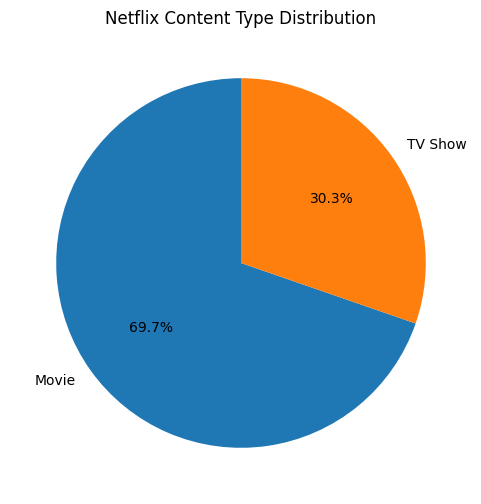

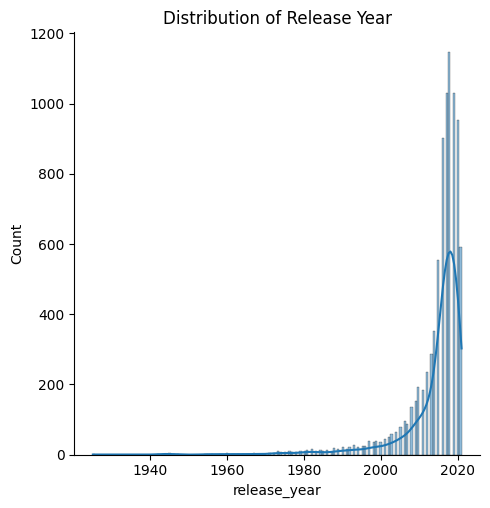

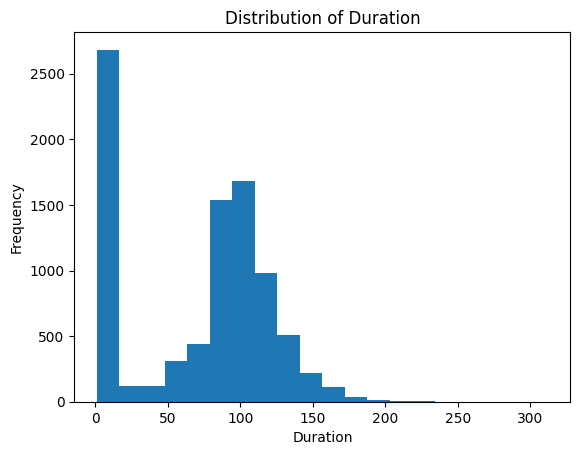

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the counts of each content type
content_type_counts = df_netflix['type'].value_counts()

# Create the pie chart
plt.figure(figsize=(6, 6))  # Adjust figure size if needed
plt.pie(content_type_counts, labels=content_type_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Netflix Content Type Distribution')
plt.show()

# Distplot for 'release_year'
sns.displot(df_netflix['release_year'], kde=True)
plt.title('Distribution of Release Year')
plt.show()

# Histogram for 'duration_int' (assuming this is the numerical duration)
plt.hist(df_netflix['duration_int'], bins=20)
plt.title('Distribution of Duration')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.show()



#Boxplot for categorical variables

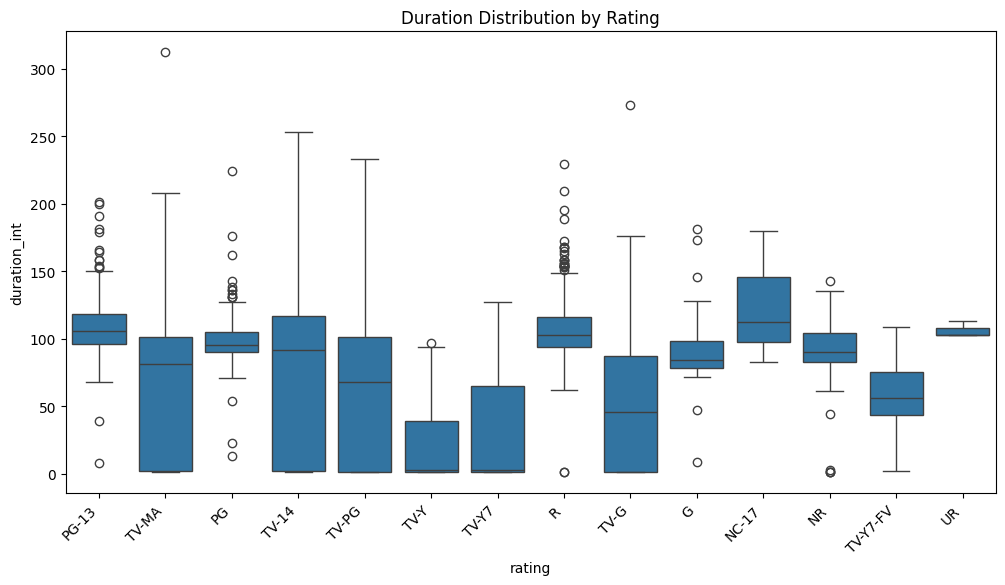

In [14]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='rating', y='duration_int', data=df_netflix)
plt.title('Duration Distribution by Rating')
plt.xticks(rotation=45, ha='right')
plt.show()

#Correlation analysis using heatmaps and pairplots

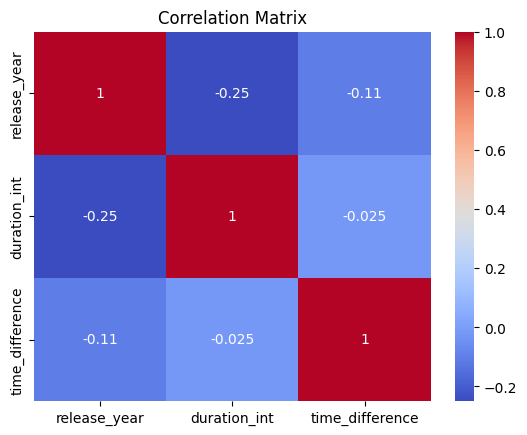

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

df_netflix['date_added'] = pd.to_datetime(df_netflix['date_added'], errors='coerce')
df_netflix['time_difference'] = (pd.to_datetime('2025-04-26') - df_netflix['date_added']).dt.days
df_netflix['time_difference'] = df_netflix['time_difference'].fillna(0).astype(int)

numerical_cols = ['release_year', 'duration_int', 'time_difference']
correlation_matrix = df_netflix[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#Generate a word cloud from the 'listed_in' column and find the mode of the 'time_difference' column.



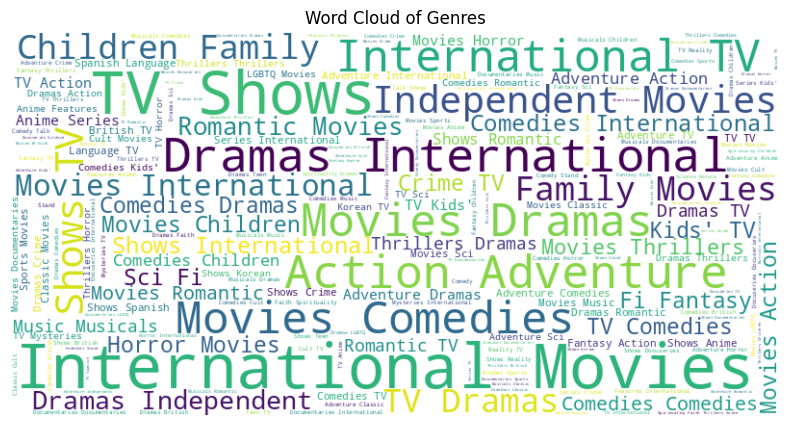

The mode of the time difference is: 1942 days


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 1. Word cloud for 'listed_in'
text = ' '.join(netflix_df['listed_in'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Genres')
plt.show()

# 2. Mode of 'time_difference'
mode_time_difference = netflix_df['time_difference'].mode()[0]
print(f"The mode of the time difference is: {mode_time_difference} days")

In [18]:
import plotly.express as px

# Group by country and count titles
country_counts = df_netflix.groupby('country')['title'].nunique().reset_index()

# Create the choropleth map
fig = px.choropleth(
    country_counts,
    locations='country',
    locationmode='country names',
    color='title',
    hover_name='country',
    color_continuous_scale='Viridis',  # Choose a color scale
    title='Netflix Content Contribution by Country'
)

fig.show()

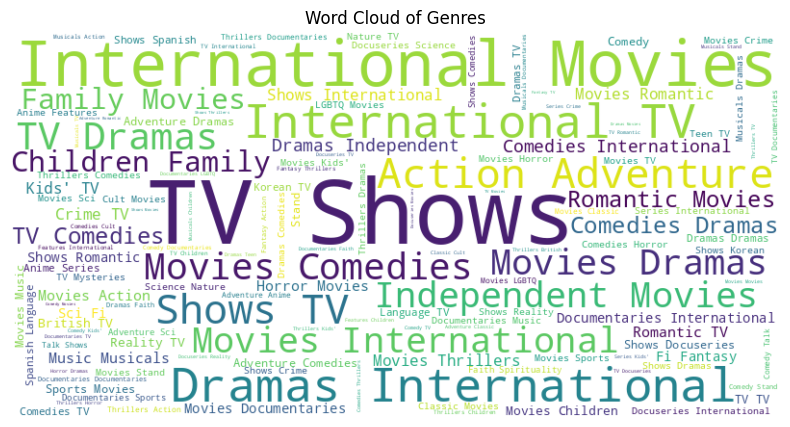

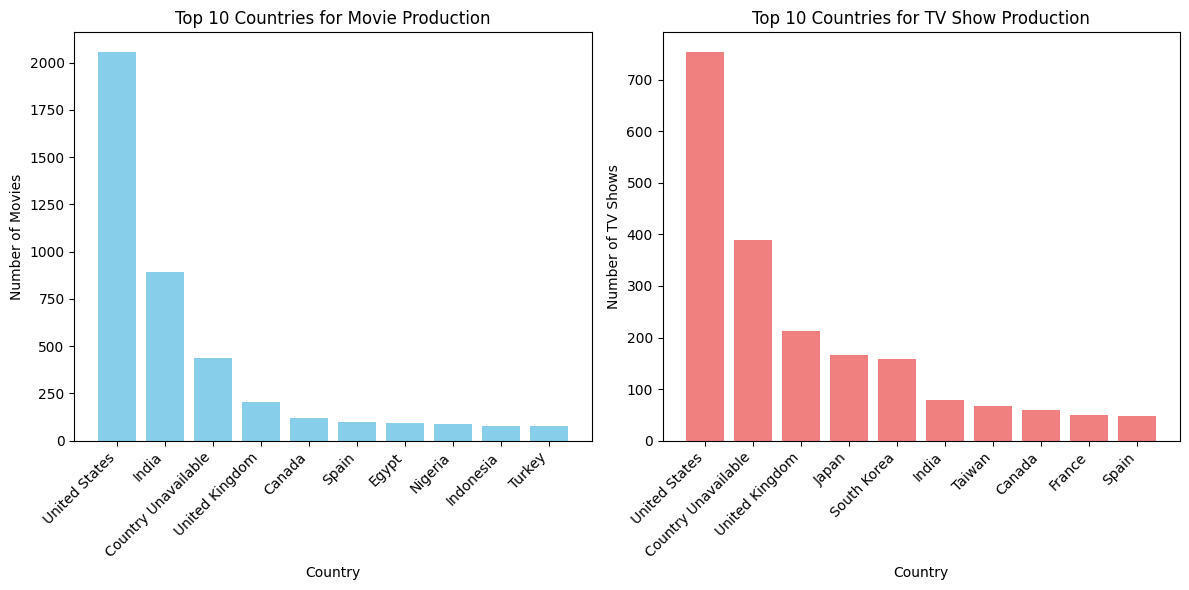

<ipython-input-19-f7403990caa4>:47: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




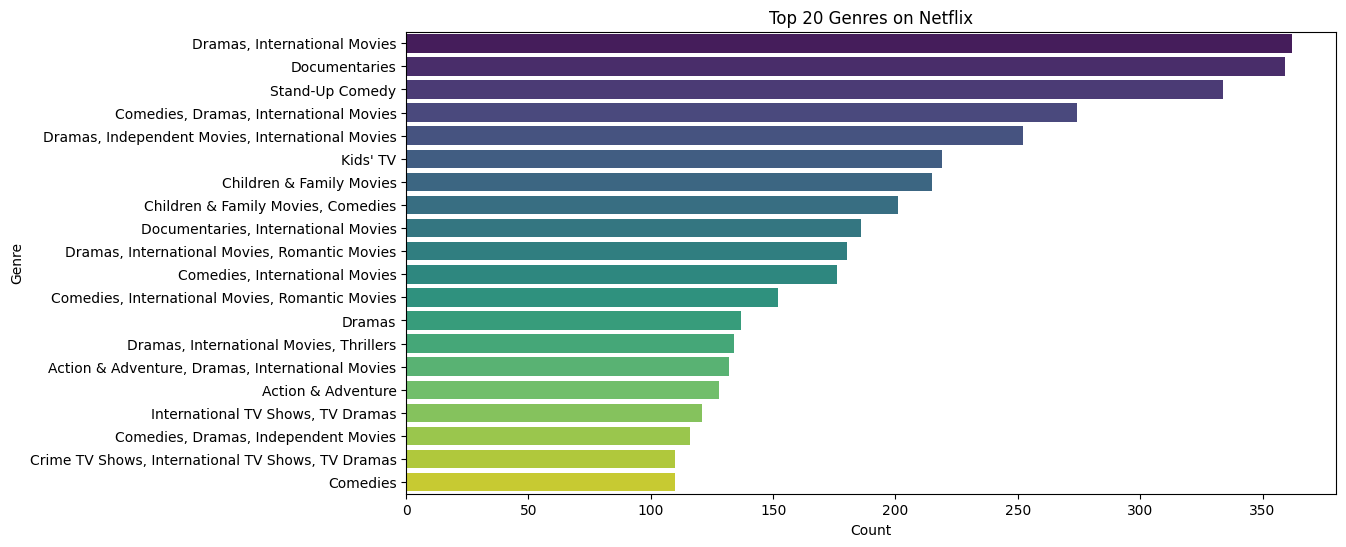

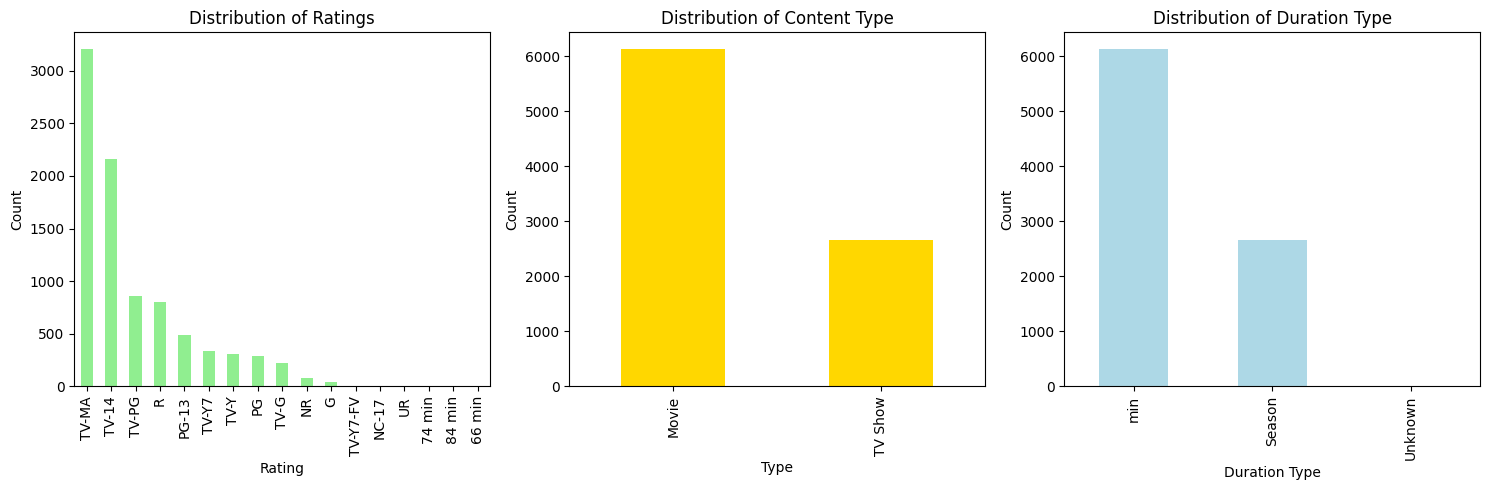

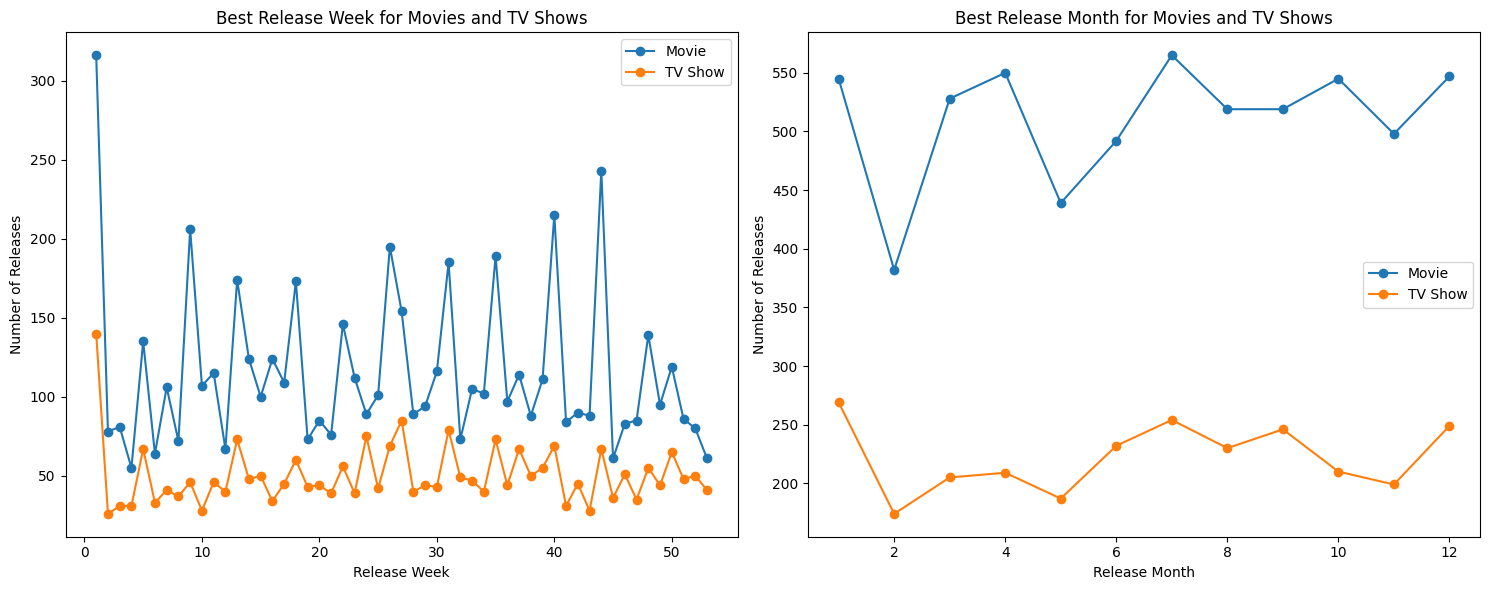

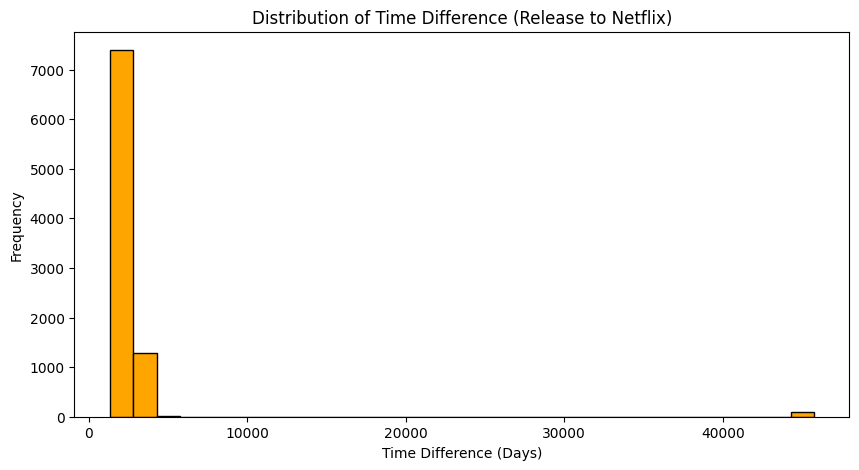

<ipython-input-19-f7403990caa4>:129: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




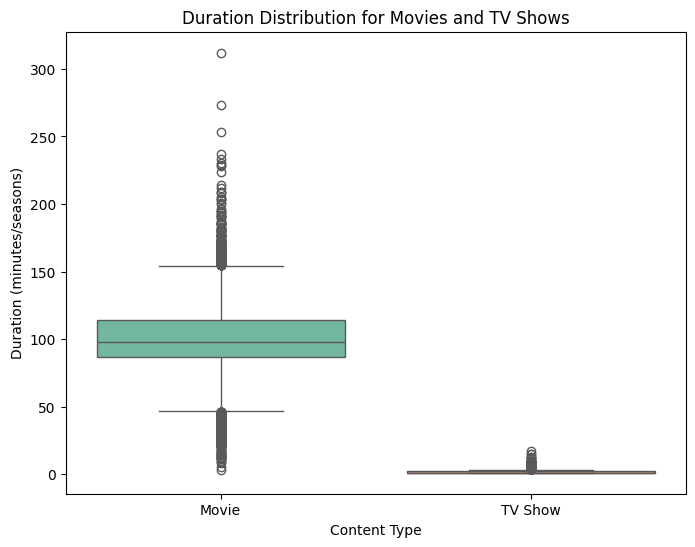

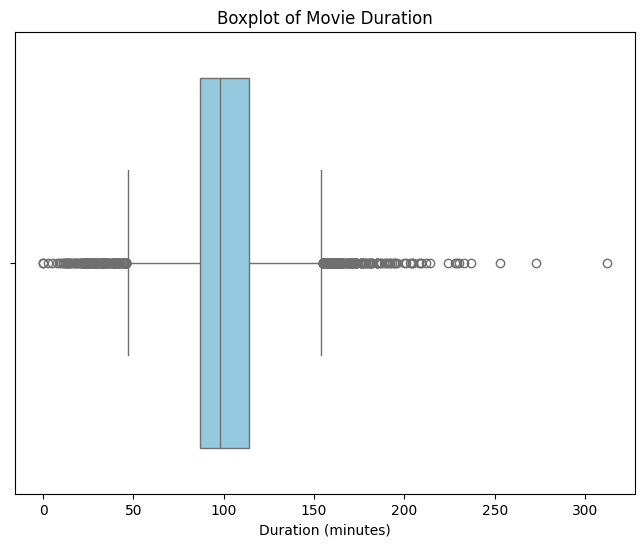

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# 1. Word Cloud for Movie Genres
plt.figure(figsize=(10, 5))
text = ' '.join(netflix_df['listed_in'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Genres')
plt.savefig('wordcloud_genres.png') # save the plot as a png image
plt.show()


# 2. Top 10 Countries (Movies and TV Shows)
plt.figure(figsize=(12, 6))

# Top 10 Movies
top_10_movies = netflix_df[netflix_df['type'] == 'Movie'].groupby('country')['title'].nunique().sort_values(ascending=False).head(10)
plt.subplot(1, 2, 1)
plt.bar(top_10_movies.index, top_10_movies.values, color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Countries for Movie Production')
plt.xlabel('Country')
plt.ylabel('Number of Movies')


# Top 10 TV Shows
top_10_tvshows = netflix_df[netflix_df['type'] == 'TV Show'].groupby('country')['title'].nunique().sort_values(ascending=False).head(10)
plt.subplot(1, 2, 2)
plt.bar(top_10_tvshows.index, top_10_tvshows.values, color='lightcoral')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Countries for TV Show Production')
plt.xlabel('Country')
plt.ylabel('Number of TV Shows')

plt.tight_layout()
plt.savefig('top_countries_production.png') # save the plot as a png image
plt.show()


# Get top 20 genres
top_20_genres = df_netflix['listed_in'].value_counts().head(20)

# Create count plot
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
sns.countplot(y='listed_in', data=df_netflix, order=top_20_genres.index, palette='viridis')  # Use 'palette' for color customization
plt.title('Top 20 Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()


# 3. Count Plots for Categorical Variables
plt.figure(figsize=(15, 5))

# Rating
plt.subplot(1, 3, 1)
netflix_df['rating'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')

# Type
plt.subplot(1, 3, 2)
netflix_df['type'].value_counts().plot(kind='bar', color='gold')
plt.title('Distribution of Content Type')
plt.xlabel('Type')
plt.ylabel('Count')

# Duration Type
plt.subplot(1, 3, 3)
netflix_df['duration_type'].value_counts().plot(kind='bar', color='lightblue')
plt.title('Distribution of Duration Type')
plt.xlabel('Duration Type')
plt.ylabel('Count')

plt.tight_layout()
plt.savefig('categorical_distributions.png')  # save the plot as a png image
plt.show()


# 4. Best Release Weeks and Months
plt.figure(figsize=(15, 6))

# Best Release Week
plt.subplot(1, 2, 1)
best_release_week = netflix_df.groupby(['release_week', 'type']).size().reset_index(name='counts')
for t in best_release_week['type'].unique():
    subset = best_release_week[best_release_week['type'] == t]
    plt.plot(subset['release_week'], subset['counts'], label=t, marker='o')
plt.legend()
plt.xlabel('Release Week')
plt.ylabel('Number of Releases')
plt.title('Best Release Week for Movies and TV Shows')


# Best Release Month
plt.subplot(1, 2, 2)
best_release_month = netflix_df.groupby(['release_month', 'type']).size().reset_index(name='counts')
for t in best_release_month['type'].unique():
    subset = best_release_month[best_release_month['type'] == t]
    plt.plot(subset['release_month'], subset['counts'], label=t, marker='o')
plt.legend()
plt.xlabel('Release Month')
plt.ylabel('Number of Releases')
plt.title('Best Release Month for Movies and TV Shows')

plt.tight_layout()
plt.savefig('best_release_time.png') # save the plot as a png image
plt.show()


# 5. Time Difference Distribution
plt.figure(figsize=(10, 5))
plt.hist(netflix_df['time_difference'], bins=30, color='orange', edgecolor='black')
plt.title('Distribution of Time Difference (Release to Netflix)')
plt.xlabel('Time Difference (Days)')
plt.ylabel('Frequency')
plt.savefig('time_difference_histogram.png') # save the plot as a png image
plt.show()

# Filter data for movies and TV shows
movies = df_netflix[df_netflix['type'] == 'Movie']
tv_shows = df_netflix[df_netflix['type'] == 'TV Show']

# Create box plot
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
sns.boxplot(x='type', y='duration_int', data=df_netflix, palette='Set2')  # Use 'palette' for color customization
plt.title('Duration Distribution for Movies and TV Shows')
plt.xlabel('Content Type')
plt.ylabel('Duration (minutes/seasons)')
plt.show()

# Filter data for movies only
movies = netflix_df[netflix_df['type'] == 'Movie']

# Create boxplot for movie durations
plt.figure(figsize=(8, 6))
sns.boxplot(x=movies['duration_int'], color='skyblue')  # Adjust color as needed
plt.title('Boxplot of Movie Duration')
plt.xlabel('Duration (minutes)')
plt.show()

# Create genre presence matrix
genre_presence = pd.get_dummies(df_netflix['listed_in']).groupby(df_netflix['show_id']).sum()

# Calculate correlation matrix
genre_correlation = genre_presence.corr()

# Create heatmap
plt.figure(figsize=(12, 10))  # Adjust figure size as needed
sns.heatmap(genre_correlation, cmap='coolwarm', annot=False)  # Set annot=True for values
plt.title('Genre Correlation Heatmap')
plt.show()

#Business Insights

##Content Preferences:
  **Insight:** International movies and TV shows have gained significant popularity. The US still dominates production, but content from India, the UK, and other countries are gaining traction.
  
  **Inference:** This suggests diversifying content to cater to global audiences.

##Global Expansion:
  **Insight:** Specific countries exhibit strong preferences for certain genres. For example, Indian audiences may favor Bollywood content, while South Korean dramas have a dedicated following globally.
  
  **Inference:** Tailoring content recommendations and marketing efforts based on regional preferences could improve engagement.

##Trends Over Time:
  **Insight:** The number of releases on Netflix has been increasing over the years, with a significant rise in recent years.
  
  **Inference:** Staying ahead of content trends and adapting to evolving audience preferences is crucial for success.

##Optimal Release Timing:
  **Insight:** Movies and TV shows released on specific days of the week and months tend to perform better.
        
  **Inference:** Strategizing release dates to align with these patterns could maximize viewership.
     
##Key Talent:

  **Insight:** Certain actors, directors, and genres consistently attract large audiences.
  
  **Inference:** Collaborating with popular talent and focusing on high-performing genres can improve content success.

##Content Duration:
  **Insight:** Movies generally have shorter durations compared to TV shows, which are often multi-seasonal.
  
  **Inference:** Consider diversifying content offerings with both short-form (movies) and long-form (TV series) content to cater to different viewer preferences.



##Recommendations



1.   Diversify Content: Invest in producing more international content, especially from regions with growing Netflix adoption.
2.   Localize Content: Consider language dubbing and subtitling to reach wider audiences.
3. Personalize Recommendations: Enhance recommendation algorithms to account for user location and viewing history.
4.   Optimize Release Schedule: Plan content releases strategically to align with peak viewing times and audience preferences.
5.   Collaborate with Top Talent: Partner with popular actors, directors, and production houses to attract viewers.
6.  Promote Diverse Genres: Ensure a balanced mix of genres to cater to different preferences.
7. Leverage Data Insights: Continuously monitor data to identify emerging trends and adapt content strategy accordingly.
8. Focus on Original Content: Invest in producing high-quality original movies and TV shows to differentiate Netflix from competitors.
9. Expand Marketing Efforts: Promote content through targeted advertising and social media campaigns to reach specific audiences.
10.   Gather User Feedback: Actively solicit feedback from users to understand their preferences and improve content offerings.

    
    
    
    
  
